In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Memuat dataset
df = pd.read_csv("ObesityDataSet.csv")  # Ganti dengan path file Anda

## Exploratory Data Analysis

In [3]:
# Menampilkan beberapa baris pertama
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Menampilkan informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [5]:
# Menampilkan deskripsi data
df.describe()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [6]:
df.shape

(2111, 17)

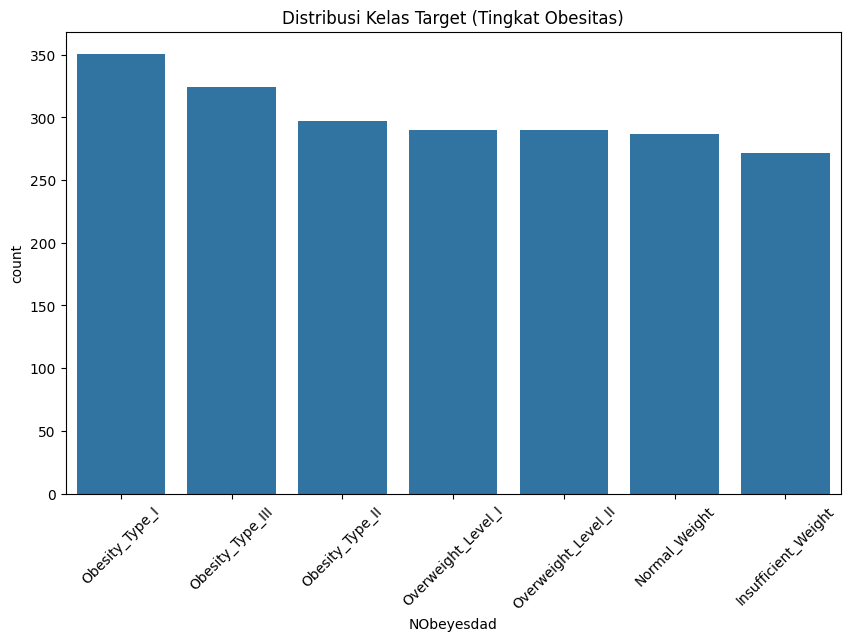

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.title("Distribusi Kelas Target (Tingkat Obesitas)")
plt.xticks(rotation=45)
plt.show()

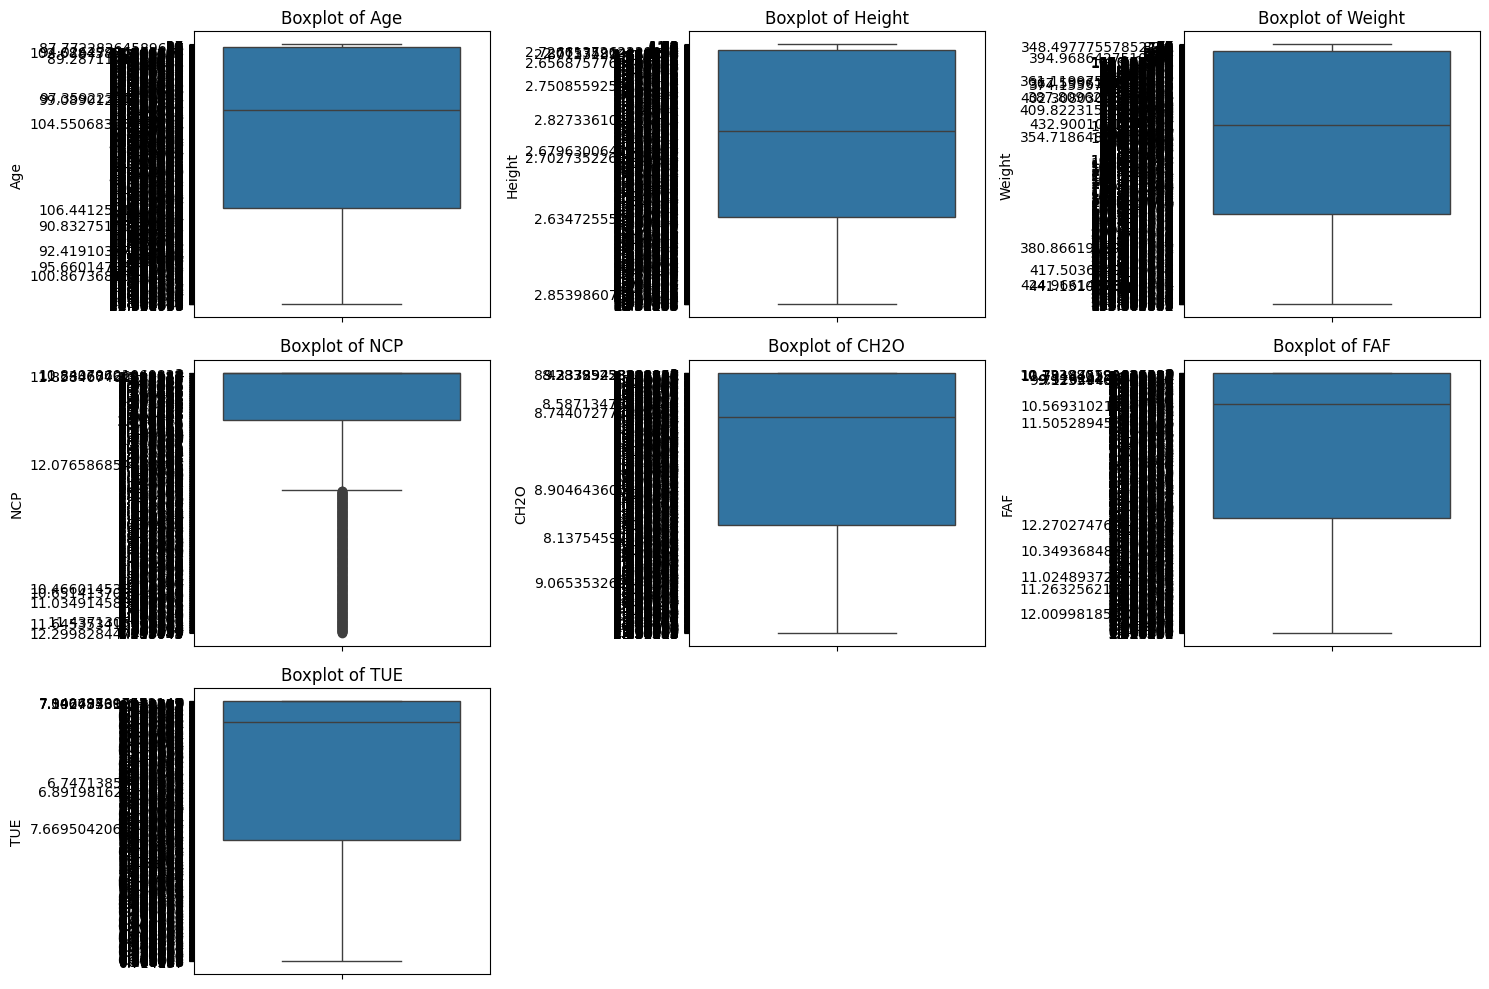

In [8]:
features_cont = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE']

plt.figure(figsize=(15,10))
for i, col in enumerate(features_cont):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

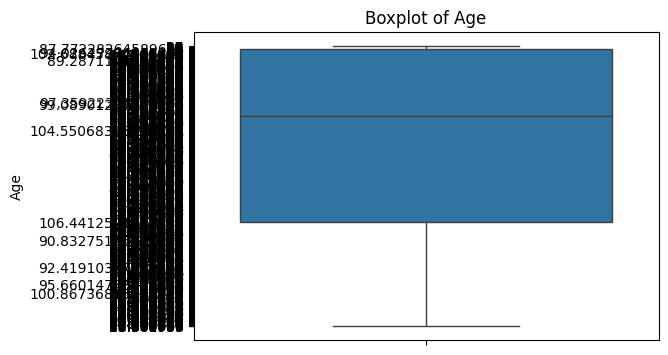

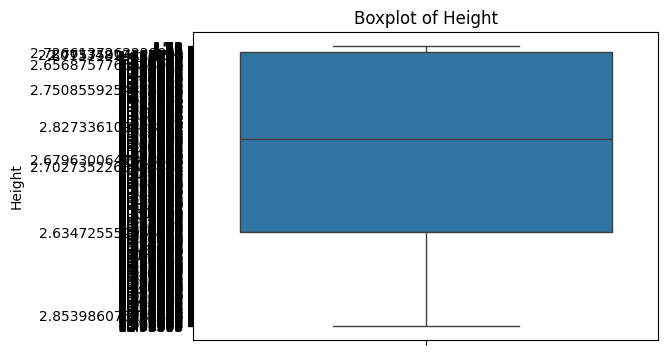

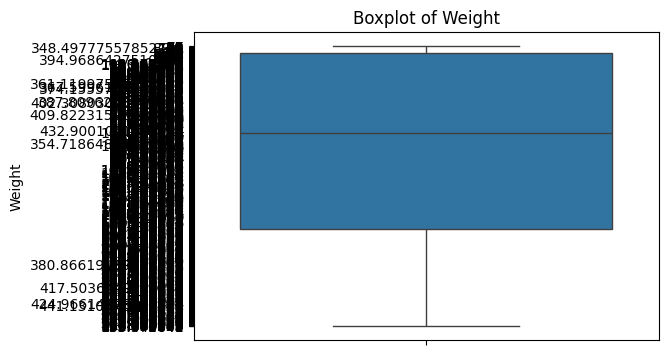

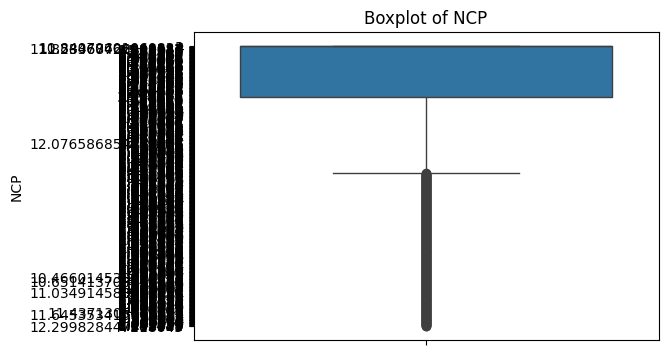

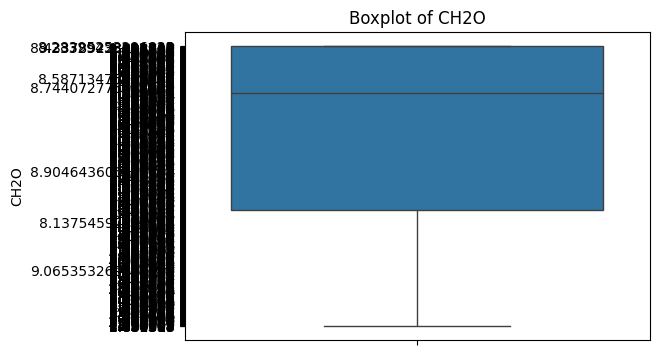

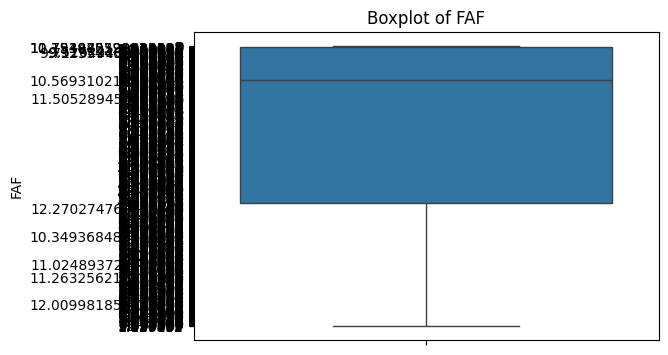

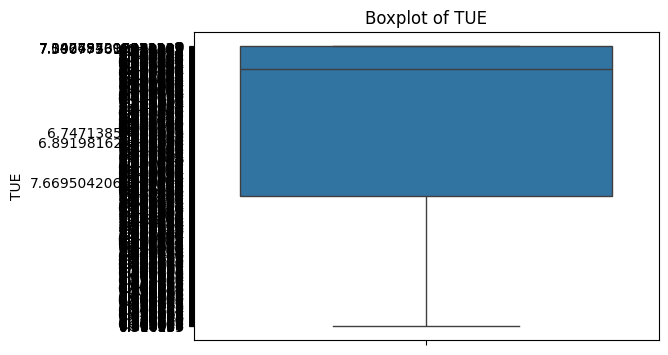

In [12]:
features_cont = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE']

for col in features_cont:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
# Cek missing values
df.isnull().sum()

,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


In [ ]:
# Cek duplikasi data
df.duplicated().sum()

np.int64(18)

In [ ]:
# Cek nilai unik / unique values
df.nunique()

,0
Age,1394
Gender,3
Height,1562
Weight,1518
CALC,5
FAVC,3
FCVC,808
NCP,637
SCC,3
SMOKE,3


## 📊 Kesimpulan Exploratory Data Analysis (EDA)

### 1. Struktur dan Kualitas Data
- Jumlah data: **2111 entri**
- Jumlah fitur: **17 kolom (16 fitur + 1 target)**
- Beberapa kolom numerik seperti `Age`, `Height`, `Weight`, dll., masih dalam tipe **object** → perlu dikonversi ke tipe numerik.
- Terdapat **18 data duplikat**

---

### 2. Missing Values
- Hampir semua kolom memiliki **missing values**, berkisar antara 5–14 nilai per kolom.
- Kolom target (`NObeyesdad`) **tidak memiliki missing value**.

---

### 3. Analisis Boxplot (Distribusi Data Numerik)
- **Age**: Terdapat outlier ekstrem (>180 tahun), kemungkinan kesalahan input.
- **Height & Weight**: Distribusi normal, namun ada nilai ekstrem (e.g., tinggi >2.2m, berat >150kg).
- **NCP (Jumlah makan besar per hari)**: Banyak outlier (lebih dari 10 kali makan per hari).
- **FAF & TUE**: Aktivitas fisik dan penggunaan teknologi menunjukkan variasi tinggi dan outlier.
- **CH2O (konsumsi air)**: Beberapa nilai ekstrem muncul.

---

### 4. Distribusi Target (NObeyesdad)
- Terdiri dari **7 kelas kategori obesitas**:
  - Distribusi relatif seimbang.
  - Kelas terbanyak: `Obesity_Type_I` (~351 data)
  - Kelas tersedikit: `Insufficient_Weight` (~270 data)

---

### 5. Nilai Unik & Tipe Fitur
- Beberapa fitur numerik memiliki ratusan nilai unik (e.g., `CH2O`, `FAF`, `FCVC`, dll.)
- Fitur kategorikal seperti `Gender`, `CALC`, `FAVC`, `MTRANS`, dan `CAEC` memiliki jumlah kategori terbatas dan siap untuk proses encoding.

---


## Preprocessing Data

In [15]:
# Definisikan kolom numerik dan kategorikal
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_cols = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
                    'family_history_with_overweight', 'CAEC', 'MTRANS']

# Pastikan semua kolom numerik dikonversi ke float (jika masih object karena koma atau spasi)
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(',', '.')
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Tangani missing values
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-15-e897ab8b2cb2>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-15-e897ab8b2cb2>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
# Cek duplikasi data
df.duplicated().sum()

np.int64(0)

In [18]:
# Drop nilai ekstrem tak logis
df = df[(df['FAF'] <= 24) & (df['TUE'] <= 24)]

In [19]:
# Cek nilai unik / unique values
df.nunique()

,0
Age,1393
Gender,3
Height,1561
Weight,1517
CALC,5
FAVC,3
FCVC,807
NCP,636
SCC,3
SMOKE,3


In [20]:
# Cek distribusi nilai terbanyak dan ekstrem
for col in numeric_cols:
    print(f"\n{col} - Unique values: {df[col].nunique()}")
    print("Top values:\n", df[col].value_counts().head())
    print("Max:", df[col].max(), "Min:", df[col].min())


Age - Unique values: 1393
Top values:
 Age
18.0    122
26.0     99
23.0     89
21.0     80
19.0     59
Name: count, dtype: int64
Max: 106.4412521246347 Min: 14.0

Height - Unique values: 1561
Top values:
 Height
1.70    58
1.65    50
1.60    41
1.75    39
1.80    27
Name: count, dtype: int64
Max: 2.853986075232335 Min: 1.45

Weight - Unique values: 1517
Top values:
 Weight
80.0    58
50.0    42
75.0    39
60.0    36
83.0    29
Name: count, dtype: int64
Max: 441.1310776586406 Min: 39.0

FCVC - Unique values: 807
Top values:
 FCVC
3.000000    645
2.000000    575
1.000000     33
2.397284     19
2.630137      2
Name: count, dtype: int64
Max: 8.706794695591519 Min: 1.0

NCP - Unique values: 636
Top values:
 NCP
3.000000    1203
1.000000     179
4.000000      69
2.644692       2
1.104642       2
Name: count, dtype: int64
Max: 12.299828447218044 Min: 1.0

CH2O - Unique values: 1262
Top values:
 CH2O
2.000000    455
1.000000    207
3.000000    146
2.825629      3
1.636326      3
Name: count, 